In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [5]:
%matplotlib inline
sns.set_theme()

In [4]:
df = pd.read_csv("kaggle_survey_2020_responses.csv")

In [8]:
df.columns.to_list()

['time_from_start_to_finish_seconds',
 'q1',
 'q2',
 'q3',
 'q4',
 'q5',
 'q6',
 'q7_part_1',
 'q7_part_2',
 'q7_part_3',
 'q7_part_4',
 'q7_part_5',
 'q7_part_6',
 'q7_part_7',
 'q7_part_8',
 'q7_part_9',
 'q7_part_10',
 'q7_part_11',
 'q7_part_12',
 'q7_other',
 'q8',
 'q9_part_1',
 'q9_part_2',
 'q9_part_3',
 'q9_part_4',
 'q9_part_5',
 'q9_part_6',
 'q9_part_7',
 'q9_part_8',
 'q9_part_9',
 'q9_part_10',
 'q9_part_11',
 'q9_other',
 'q10_part_1',
 'q10_part_2',
 'q10_part_3',
 'q10_part_4',
 'q10_part_5',
 'q10_part_6',
 'q10_part_7',
 'q10_part_8',
 'q10_part_9',
 'q10_part_10',
 'q10_part_11',
 'q10_part_12',
 'q10_part_13',
 'q10_other',
 'q11',
 'q12_part_1',
 'q12_part_2',
 'q12_part_3',
 'q12_other',
 'q13',
 'q14_part_1',
 'q14_part_2',
 'q14_part_3',
 'q14_part_4',
 'q14_part_5',
 'q14_part_6',
 'q14_part_7',
 'q14_part_8',
 'q14_part_9',
 'q14_part_10',
 'q14_part_11',
 'q14_other',
 'q15',
 'q16_part_1',
 'q16_part_2',
 'q16_part_3',
 'q16_part_4',
 'q16_part_5',
 'q16_pa

In [10]:
df["q24"].value_counts()

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: q24, dtype: int64

## Q25

**Approximately how much money have you (or your team) spent on machine learning and/or cloud
computing services at home (or at work) in the past 5 years (​approximate $USD​)?**
* 0
* 1-99
* 100-999
* 1000-9999
* 10000-99999
* 100000 or more

In [19]:
q25_col_names = ["q25"]

In [21]:
q25_df = pd.concat([df["q24"], df[q25_col_names]], axis = 1)
q25_df

,q24,q25
0,NaN,NaN
1,"100,000-124,999","$100,000 or more ($USD)"
2,"15,000-19,999",$0 ($USD)
3,"125,000-149,999","$10,000-$99,999"
4,NaN,NaN
...,...,...
20031,NaN,NaN
20032,NaN,NaN
20033,$0-999,$0 ($USD)
20034,$0-999,$0 ($USD)


In [23]:
set(q25_df["q25"])

{'$0 ($USD)',
 '$1-$99',
 '$10,000-$99,999',
 '$100,000 or more ($USD)',
 '$100-$999',
 '$1000-$9,999',
 nan}

In [37]:
q25_order = [
    '$0 ($USD)',
 '$1-$99',
  '$100-$999',
   '$1000-$9,999',
 '$10,000-$99,999',
 '$100,000 or more ($USD)',
]

In [38]:
### Code here
def convert_to_category_codes(col_name: str, order_rules: list, data):
    data[col_name] = pd.Categorical(data[col_name], order_rules)
    data[col_name] = data[col_name].cat.codes + 1 # because NaN automatically becomes -1
    return data

In [40]:
q25_encoded = q25_df.copy()
convert_to_category_codes("q25", q25_order, q25_encoded)

,q24,q25
0,NaN,0
1,"100,000-124,999",6
2,"15,000-19,999",1
3,"125,000-149,999",5
4,NaN,0
...,...,...
20031,NaN,0
20032,NaN,0
20033,$0-999,1
20034,$0-999,1


In [41]:
q25_encoded["q25"].value_counts()

0    9466
1    3856
4    1829
3    1764
2    1317
5    1075
6     729
Name: q25, dtype: int64

## Q26

In [43]:
q26_col_names = ['q26_a_part_1',
 'q26_a_part_2',
 'q26_a_part_3',
 'q26_a_part_4',
 'q26_a_part_5',
 'q26_a_part_6',
 'q26_a_part_7',
 'q26_a_part_8',
 'q26_a_part_9',
 'q26_a_part_10',
 'q26_a_part_11',
 'q26_a_other']

In [44]:
q26_df = pd.concat([df["q24"], df[q26_col_names]], axis = 1)
q26_df

,q24,q26_a_part_1,q26_a_part_2,q26_a_part_3,q26_a_part_4,q26_a_part_5,q26_a_part_6,q26_a_part_7,q26_a_part_8,q26_a_part_9,q26_a_part_10,q26_a_part_11,q26_a_other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"100,000-124,999",Amazon Web Services (AWS),Microsoft Azure,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"15,000-19,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,"125,000-149,999",Amazon Web Services (AWS),NaN,NaN,NaN,NaN,NaN,Salesforce Cloud,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,$0-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,$0-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
q26_1_aws = q26_df["q26_a_part_1"].notna().astype(int)
q26_1_aws.value_counts()

0    17230
1     2806
Name: q26_a_part_1, dtype: int64

In [77]:
q26_2_azure = q26_df["q26_a_part_2"].notna().astype(int)
q26_2_azure.value_counts()

0    18331
1     1705
Name: q26_a_part_2, dtype: int64

In [78]:
q26_3_gcp = q26_df["q26_a_part_3"].notna().astype(int)
q26_3_gcp.value_counts()

0    17750
1     2286
Name: q26_a_part_3, dtype: int64

In [79]:
q26_4_ibm = q26_df["q26_a_part_4"].notna().astype(int)
q26_4_ibm.value_counts()

0    19595
1      441
Name: q26_a_part_4, dtype: int64

In [80]:
q26_5_oracle = q26_df["q26_a_part_5"].notna().astype(int)
q26_5_oracle.value_counts()

0    19750
1      286
Name: q26_a_part_5, dtype: int64

In [81]:
q26_6_sap = q26_df["q26_a_part_6"].notna().astype(int)
q26_6_sap.value_counts()

0    19867
1      169
Name: q26_a_part_6, dtype: int64

In [82]:
q26_7_salesforce = q26_df["q26_a_part_7"].notna().astype(int)
q26_7_salesforce.value_counts()

0    19844
1      192
Name: q26_a_part_7, dtype: int64

In [83]:
q26_8_vmware = q26_df["q26_a_part_8"].notna().astype(int)
q26_8_vmware.value_counts()

0    19788
1      248
Name: q26_a_part_8, dtype: int64

In [84]:
q26_9_alibaba = q26_df["q26_a_part_9"].notna().astype(int)
q26_9_alibaba.value_counts()

0    19921
1      115
Name: q26_a_part_9, dtype: int64

In [85]:
q26_10_tencent= q26_df["q26_a_part_10"].notna().astype(int)
q26_10_tencent.value_counts()

0    19960
1       76
Name: q26_a_part_10, dtype: int64

In [86]:
q26_11_none= q26_df["q26_a_part_11"].notna().astype(int)
q26_11_none.value_counts()

0    18199
1     1837
Name: q26_a_part_11, dtype: int64

In [87]:
q26_12_other= q26_df["q26_a_other"].notna().astype(int)
q26_12_other.value_counts()

0    19791
1      245
Name: q26_a_other, dtype: int64

In [89]:
q26_updated_col_names = [
    q26_1_aws,
    q26_2_azure,
    q26_3_gcp,
    q26_4_ibm,
    q26_5_oracle,
    q26_6_sap,
    q26_7_salesforce,
    q26_8_vmware,
    q26_9_alibaba,
    q26_10_tencent,
    q26_11_none,
    q26_12_other
]

In [90]:
q26_combined = pd.concat(q26_updated_col_names, axis = 1)
q26_combined

,q26_a_part_1,q26_a_part_2,q26_a_part_3,q26_a_part_4,q26_a_part_5,q26_a_part_6,q26_a_part_7,q26_a_part_8,q26_a_part_9,q26_a_part_10,q26_a_part_11,q26_a_other
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20031,0,0,0,0,0,0,0,0,0,0,0,0
20032,0,0,0,0,0,0,0,0,0,0,0,0
20033,0,0,0,0,0,0,0,0,0,0,0,0
20034,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
q26_combined["total"] = q26_combined[q26_col_names].sum(axis = 1)
q26_combined

,q26_a_part_1,q26_a_part_2,q26_a_part_3,q26_a_part_4,q26_a_part_5,q26_a_part_6,q26_a_part_7,q26_a_part_8,q26_a_part_9,q26_a_part_10,q26_a_part_11,q26_a_other,total
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,0,0,0,0,0,0,0,0,0,0,0,0,0
20032,0,0,0,0,0,0,0,0,0,0,0,0,0
20033,0,0,0,0,0,0,0,0,0,0,0,0,0
20034,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='total', ylabel='Count'>

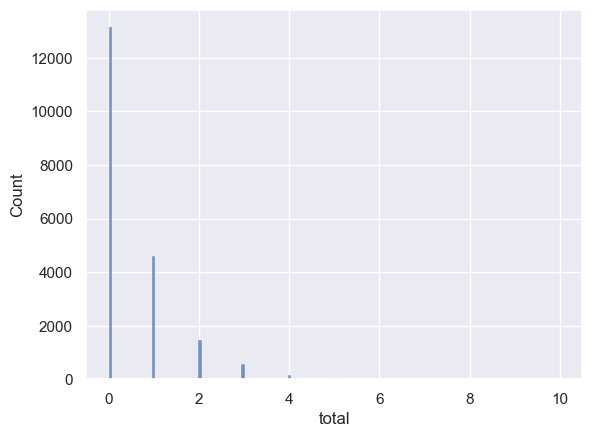

In [93]:
sns.histplot(q26_combined, x = "total")

In [94]:
q26_combined["total"].value_counts()

0     13140
1      4614
2      1473
3       558
4       158
5        55
6        22
7         7
10        6
8         3
Name: total, dtype: int64

## Q27

In [ ]:
q27_col_names = ['q27_a_part_1',
 'q27_a_part_2',
 'q27_a_part_3',
 'q27_a_part_4',
 'q27_a_part_5',
 'q27_a_part_6',
 'q27_a_part_7',
 'q27_a_part_8',
 'q27_a_part_9',
 'q27_a_part_10',
 'q27_a_part_11',
 'q27_a_other']

## Q28

In [ ]:
q28_col_names = ['q28_a_part_1',
 'q28_a_part_2',
 'q28_a_part_3',
 'q28_a_part_4',
 'q28_a_part_5',
 'q28_a_part_6',
 'q28_a_part_7',
 'q28_a_part_8',
 'q28_a_part_9',
 'q28_a_part_10',
 'q28_a_other']

## Q29

In [ ]:
q29_col_names = ['q29_a_part_1',
 'q29_a_part_2',
 'q29_a_part_3',
 'q29_a_part_4',
 'q29_a_part_5',
 'q29_a_part_6',
 'q29_a_part_7',
 'q29_a_part_8',
 'q29_a_part_9',
 'q29_a_part_10',
 'q29_a_part_11',
 'q29_a_part_12',
 'q29_a_part_13',
 'q29_a_part_14',
 'q29_a_part_15',
 'q29_a_part_16',
 'q29_a_part_17',
 'q29_a_other']

## Q30

In [27]:
q30_col_names = ["q30"]

In [28]:
q30_df = pd.concat([df["q24"], df[q30_col_names]], axis = 1)
q30_df

,q24,q30
0,NaN,NaN
1,"100,000-124,999",PostgresSQL
2,"15,000-19,999",NaN
3,"125,000-149,999",MySQL
4,NaN,NaN
...,...,...
20031,NaN,NaN
20032,NaN,NaN
20033,$0-999,NaN
20034,$0-999,NaN


In [7]:
q30_df["q30"].value_counts()

MySQL                                764
PostgresSQL                          521
Microsoft SQL Server                 513
MongoDB                              313
Oracle Database                      258
Google Cloud BigQuery                209
SQLite                               156
Amazon Redshift                      127
Microsoft Azure Data Lake Storage    117
Other                                 91
Amazon Athena                         76
Snowflake                             72
IBM Db2                               67
Amazon DynamoDB                       66
Google Cloud SQL                      60
Microsoft Access                      56
Google Cloud Firestore                47
Name: q30, dtype: int64

In [33]:
q30_df["q30"] = q30_df["q30"].notna().astype(int)
q30_df

,q24,q30
0,NaN,0
1,"100,000-124,999",1
2,"15,000-19,999",0
3,"125,000-149,999",1
4,NaN,0
...,...,...
20031,NaN,0
20032,NaN,0
20033,$0-999,0
20034,$0-999,0


## Q31

In [ ]:
q31_col_names = ['q31_a_part_1',
 'q31_a_part_2',
 'q31_a_part_3',
 'q31_a_part_4',
 'q31_a_part_5',
 'q31_a_part_6',
 'q31_a_part_7',
 'q31_a_part_8',
 'q31_a_part_9',
 'q31_a_part_10',
 'q31_a_part_11',
 'q31_a_part_12',
 'q31_a_part_13',
 'q31_a_part_14',
 'q31_a_other']

## Q32

In [11]:
q32_col_names = ["q32"]

In [12]:
q32_df = pd.concat([df["q24"], df[q32_col_names]], axis = 1)
q32_df

,q24,q32
0,NaN,NaN
1,"100,000-124,999",Microsoft Power BI
2,"15,000-19,999",NaN
3,"125,000-149,999",NaN
4,NaN,NaN
...,...,...
20031,NaN,NaN
20032,NaN,NaN
20033,$0-999,NaN
20034,$0-999,NaN


In [13]:
q32_df["q32"] = q32_df["q32"].notna().astype(int)
q32_df

,q24,q32
0,NaN,0
1,"100,000-124,999",1
2,"15,000-19,999",0
3,"125,000-149,999",0
4,NaN,0
...,...,...
20031,NaN,0
20032,NaN,0
20033,$0-999,0
20034,$0-999,0


## Q24

In [8]:
q24_df = df["q24"]

In [9]:
q24_df

0                    NaN
1        100,000-124,999
2          15,000-19,999
3        125,000-149,999
4                    NaN
              ...       
20031                NaN
20032                NaN
20033             $0-999
20034             $0-999
20035             $0-999
Name: q24, Length: 20036, dtype: object

In [10]:
set(q24_df)

{'$0-999',
 '1,000-1,999',
 '10,000-14,999',
 '100,000-124,999',
 '125,000-149,999',
 '15,000-19,999',
 '150,000-199,999',
 '2,000-2,999',
 '20,000-24,999',
 '200,000-249,999',
 '25,000-29,999',
 '250,000-299,999',
 '3,000-3,999',
 '30,000-39,999',
 '300,000-500,000',
 '4,000-4,999',
 '40,000-49,999',
 '5,000-7,499',
 '50,000-59,999',
 '60,000-69,999',
 '7,500-9,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '> $500,000',
 nan}

In [15]:
q24_order = ["$0-999",
             '1,000-1,999',
             '2,000-2,999',
             '3,000-3,999',
             '4,000-4,999',
             '5,000-7,499',
             '7,500-9,999',
             '10,000-14,999',
             '15,000-19,999',
             '20,000-24,999',
             '25,000-29,999',
             '30,000-39,999',
             '40,000-49,999',
             '50,000-59,999',
              '60,000-69,999',
              '70,000-79,999',
              '80,000-89,999',
              '90,000-99,999',
            '100,000-124,999',
            '125,000-149,999',
            '150,000-199,999',
             '200,000-249,999',
             '250,000-299,999',
              '300,000-500,000',
              '> $500,000'
             ]

In [12]:
def convert_to_category(col_name: str, order_rules: list, data):
    data[col_name] = pd.Categorical(data[col_name], order_rules)

In [13]:
convert_to_category("q24", q24_order, q30_df)

NameError: name 'q30_df' is not defined

In [31]:
q30_df

,q24,q30
0,NaN,NaN
1,"100,000-124,999",PostgresSQL
2,"15,000-19,999",NaN
3,"125,000-149,999",MySQL
4,NaN,NaN
...,...,...
20031,NaN,NaN
20032,NaN,NaN
20033,$0-999,NaN
20034,$0-999,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '$0-999'),
  Text(1, 0, '1,000-1,999'),
  Text(2, 0, '2,000-2,999'),
  Text(3, 0, '3,000-3,999'),
  Text(4, 0, '4,000-4,999'),
  Text(5, 0, '5,000-7,499'),
  Text(6, 0, '7,500-9,999'),
  Text(7, 0, '10,000-14,999'),
  Text(8, 0, '15,000-19,999'),
  Text(9, 0, '20,000-24,999'),
  Text(10, 0, '25,000-29,999'),
  Text(11, 0, '30,000-39,999'),
  Text(12, 0, '40,000-49,999'),
  Text(13, 0, '50,000-59,999'),
  Text(14, 0, '60,000-69,999'),
  Text(15, 0, '70,000-79,999'),
  Text(16, 0, '80,000-89,999'),
  Text(17, 0, '90,000-99,999'),
  Text(18, 0, '100,000-124,999'),
  Text(19, 0, '125,000-149,999'),
  Text(20, 0, '150,000-199,999'),
  Text(21, 0, '200,000-249,999'),
  Text(22, 0, '250,000-299,999'),
  Text(23, 0, '300,000-500,000'),
  Text(24, 0, '> $500,000')])

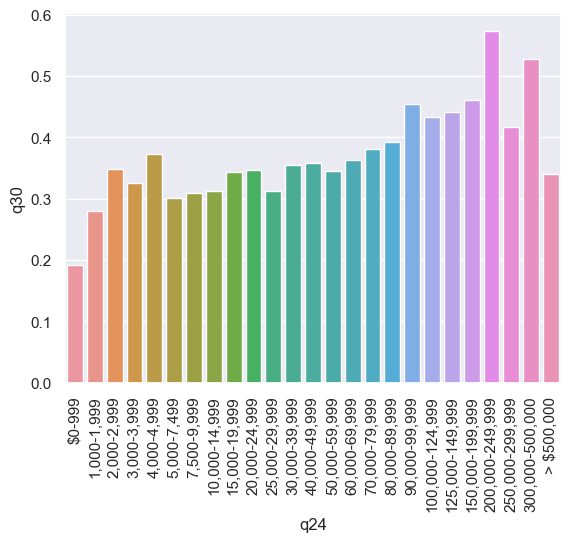

In [36]:
sns.barplot(data = q30_df, x = "q24", y = "q30", ci = None)
plt.xticks(rotation = 90)

In [37]:
convert_to_category("q24", q24_order, q32_df)
q32_df

,q24,q32
0,NaN,0
1,"100,000-124,999",1
2,"15,000-19,999",0
3,"125,000-149,999",0
4,NaN,0
...,...,...
20031,NaN,0
20032,NaN,0
20033,$0-999,0
20034,$0-999,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '$0-999'),
  Text(1, 0, '1,000-1,999'),
  Text(2, 0, '2,000-2,999'),
  Text(3, 0, '3,000-3,999'),
  Text(4, 0, '4,000-4,999'),
  Text(5, 0, '5,000-7,499'),
  Text(6, 0, '7,500-9,999'),
  Text(7, 0, '10,000-14,999'),
  Text(8, 0, '15,000-19,999'),
  Text(9, 0, '20,000-24,999'),
  Text(10, 0, '25,000-29,999'),
  Text(11, 0, '30,000-39,999'),
  Text(12, 0, '40,000-49,999'),
  Text(13, 0, '50,000-59,999'),
  Text(14, 0, '60,000-69,999'),
  Text(15, 0, '70,000-79,999'),
  Text(16, 0, '80,000-89,999'),
  Text(17, 0, '90,000-99,999'),
  Text(18, 0, '100,000-124,999'),
  Text(19, 0, '125,000-149,999'),
  Text(20, 0, '150,000-199,999'),
  Text(21, 0, '200,000-249,999'),
  Text(22, 0, '250,000-299,999'),
  Text(23, 0, '300,000-500,000'),
  Text(24, 0, '> $500,000')])

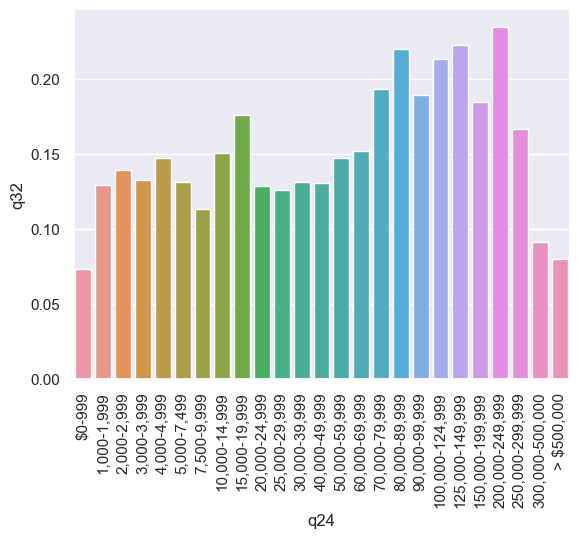

In [38]:
sns.barplot(data = q32_df, x = "q24", y = "q32", ci = None)
plt.xticks(rotation = 90)

## For Presentation

In [7]:
df.shape

(20036, 355)

In [ ]:
q32_df = pd.concat([df["q24"], df[q32_col_names]], axis = 1)
q32_df

In [14]:
q3_df = pd.concat([df["q24"], df["q3"]], axis = 1)
q3_df

,q24,q3
0,NaN,Colombia
1,"100,000-124,999",United States of America
2,"15,000-19,999",Argentina
3,"125,000-149,999",United States of America
4,NaN,Japan
...,...,...
20031,NaN,Turkey
20032,NaN,United Kingdom of Great Britain and Northern I...
20033,$0-999,Brazil
20034,$0-999,India


In [16]:
convert_to_category("q24", q24_order, q3_df)

In [25]:
q3_df

,q24,q3
0,NaN,Colombia
1,"100,000-124,999",United States of America
2,"15,000-19,999",Argentina
3,"125,000-149,999",United States of America
4,NaN,Japan
...,...,...
20031,NaN,Turkey
20032,NaN,United Kingdom of Great Britain and Northern I...
20033,$0-999,Brazil
20034,$0-999,India


In [19]:
q3_df.value_counts()

q24              q3                      
$0-999           India                       681
100,000-124,999  United States of America    249
10,000-14,999    India                       242
150,000-199,999  United States of America    231
5,000-7,499      India                       216
                                            ... 
40,000-49,999    Sri Lanka                     1
2,000-2,999      Nepal                         1
40,000-49,999    Morocco                       1
2,000-2,999      Portugal                      1
25,000-29,999    Argentina                     1
Length: 968, dtype: int64

In [23]:
q3_df[(q3_df["q3"] == "United States of America") | (q3_df["q3"] == "Canada")].value_counts()

q24              q3                      
100,000-124,999  United States of America    249
150,000-199,999  United States of America    231
125,000-149,999  United States of America    183
90,000-99,999    United States of America    112
$0-999           United States of America    102
70,000-79,999    United States of America     95
200,000-249,999  United States of America     87
80,000-89,999    United States of America     86
60,000-69,999    United States of America     60
50,000-59,999    United States of America     47
40,000-49,999    United States of America     45
300,000-500,000  United States of America     38
250,000-299,999  United States of America     31
30,000-39,999    United States of America     26
100,000-124,999  Canada                       23
80,000-89,999    Canada                       23
70,000-79,999    Canada                       20
50,000-59,999    Canada                       18
$0-999           Canada                       18
40,000-49,999    Canada    

In [26]:
q3_df[(q3_df["q3"] == "United States of America")]

,q24,q3
1,"100,000-124,999",United States of America
3,"125,000-149,999",United States of America
11,"30,000-39,999",United States of America
24,"150,000-199,999",United States of America
25,NaN,United States of America
...,...,...
19993,NaN,United States of America
20000,"150,000-199,999",United States of America
20006,"> $500,000",United States of America
20020,NaN,United States of America


In [30]:
q3_df["q24"].cat.codes

0        -1
1        18
2         8
3        19
4        -1
         ..
20031    -1
20032    -1
20033     0
20034     0
20035     0
Length: 20036, dtype: int8

In [32]:
def add_category_codes(col_name: str, col_name_with_code: str, data):
    data[col_name_with_code] = data[col_name].cat.codes

In [33]:
add_category_codes("q24", "q24_numeric", q3_df)
q3_df

,q24,q3,q24_numeric
0,NaN,Colombia,-1
1,"100,000-124,999",United States of America,18
2,"15,000-19,999",Argentina,8
3,"125,000-149,999",United States of America,19
4,NaN,Japan,-1
...,...,...,...
20031,NaN,Turkey,-1
20032,NaN,United Kingdom of Great Britain and Northern I...,-1
20033,$0-999,Brazil,0
20034,$0-999,India,0


In [36]:
q3_df_america = q3_df[(q3_df["q3"] == "United States of America")]
q3_df_america

,q24,q3,q24_numeric
1,"100,000-124,999",United States of America,18
3,"125,000-149,999",United States of America,19
11,"30,000-39,999",United States of America,11
24,"150,000-199,999",United States of America,20
25,NaN,United States of America,-1
...,...,...,...
19993,NaN,United States of America,-1
20000,"150,000-199,999",United States of America,20
20006,"> $500,000",United States of America,24
20020,NaN,United States of America,-1


In [37]:
q3_df_america["q24_numeric"].mean()

10.27983907018328

In [38]:
q3_df_canada = q3_df[(q3_df["q3"] == "Canada")]
q3_df_canada

,q24,q3,q24_numeric
13,"90,000-99,999",Canada,17
22,"125,000-149,999",Canada,19
92,"80,000-89,999",Canada,16
136,"80,000-89,999",Canada,16
251,NaN,Canada,-1
...,...,...,...
19777,NaN,Canada,-1
19804,"40,000-49,999",Canada,12
19856,NaN,Canada,-1
19879,"40,000-49,999",Canada,12


In [39]:
q3_df_canada["q24_numeric"].mean()

8.398671096345515

In [43]:
q3_df_canada_america= q3_df[(q3_df["q3"] == "United States of America") | (q3_df["q3"] == "Canada")]
q3_df_canada_america

,q24,q3,q24_numeric
1,"100,000-124,999",United States of America,18
3,"125,000-149,999",United States of America,19
11,"30,000-39,999",United States of America,11
13,"90,000-99,999",Canada,17
22,"125,000-149,999",Canada,19
...,...,...,...
19993,NaN,United States of America,-1
20000,"150,000-199,999",United States of America,20
20006,"> $500,000",United States of America,24
20020,NaN,United States of America,-1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

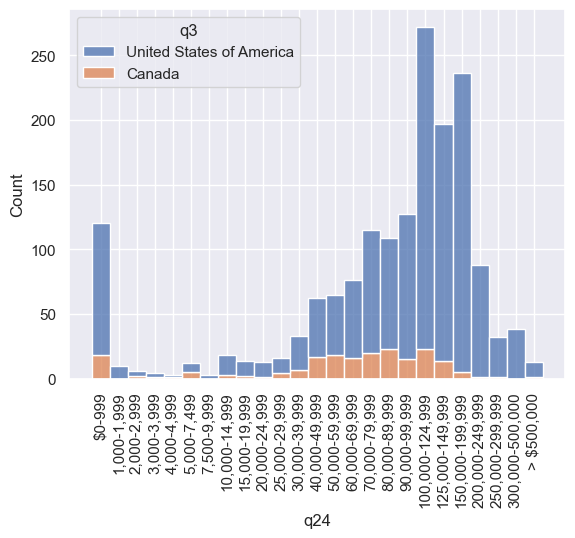

In [46]:
sns.histplot(data = q3_df_canada_america, x = "q24", hue = "q3", multiple = "stack")
plt.xticks(rotation = 90)